In [ ]:
"""
Purpose: To test computing of the confusion matrix for the following:
1) On all of the previously automatically labeled data compared to the proofread version

2) Efficiency of one older auatomatically labeled neuron in comparison to the newer automated version

"""



# Trying new way of generating the confusion matrix for all of the data

In [ ]:
import datajoint as dj
import numpy as np

dj.config["database.host"] = "10.28.0.34"
dj.config["database.user"] = "celiib"
dj.config["database.password"] = "newceliipass"
dj.config["safemode"] = True
dj.config["display.limit"] = 20

In [ ]:
pinky = dj.create_virtual_module("pinky","microns_pinky")
schema = dj.schema("microns_pinky")

In [ ]:
pinky.WholeAutoAnnotationsClusters3Optimized()

In [ ]:
pinky.WholeAutoAnnotationsClusters3Optimized() & (dj.U("segment_id") & pinky.ProofreadLabel.proj())

In [ ]:
#tables to juxtapose: 
labels_Table = pinky.WholeAutoAnnotationsClusters3Optimized()
proof_Table = pinky.ProofreadLabel()

In [ ]:
seg_id,triangles = pinky.WholeAutoAnnotationsClusters3Optimized.proj("triangles").fetch("segment_id","triangles")
auto_classifier_data = dict(list(zip(seg_id,triangles)))
auto_classifier_data

In [ ]:
seg_id,triangles = pinky.ProofreadLabel.proj("triangles").fetch("segment_id","triangles")
proofread_data = dict(list(zip(seg_id,triangles)))
#proofread_data

In [ ]:
"""
Steps for computing the overall confusion matrix
1) for each neuron go and get the proofread label answer, the automated answers
2) Generate the confusion matrix and add to local variable
3) Iterate through all neurons ids and add the confusion matrix to the total
4) Send the confusion matrix to the function that will plot it
"""

In [ ]:
pinky.LabelKey()

In [ ]:
total_labels = [k for k in range(2,14) if k != 9]
total_labels

In [ ]:
len(auto_classifier_data.keys())

In [ ]:
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
cm_total = None

for seg_id,tri in tqdm(proofread_data.items()):
    if seg_id not in auto_classifier_data.keys():
        continue
    
    #get the triangle labels from the automated run
    auto_tri = auto_classifier_data[seg_id].astype("int")
    auto_tri[np.where(auto_tri>= 13)] = 13
    
    
    #get a confusion matrix 
    
    cm = confusion_matrix(tri, auto_tri,labels=total_labels)
    
    if not(type(cm_total) is np.ndarray):
        cm_total = cm
    else:
        cm_total = cm_total + cm
    

In [ ]:
# import numpy as np
# cm_total_npz = np.load("cm_total.npz")
# cm_total = cm_total_npz["cm_total"]
# classes = cm_total_npz["classes"]

In [ ]:
pinky.LabelKey()

In [ ]:
Label_key_data = pinky.LabelKey.fetch(as_dict=True)
kept_data = Label_key_data[2:9] + Label_key_data[10:13]
kept_data

classes = [k["description"] for k in kept_data]
cm_labels = [k["numeric"] for k in kept_data]
classes.append("unknown")
cm_labels.append(13)

In [ ]:
classes

In [ ]:
np.savez("cm_total.npz",cm_total=cm_total,classes=classes,cm_labels=cm_labels)

# Load in the confusion matrix and display it

In [1]:
import celii_confusion_plotting as cp

In [2]:
import numpy as np
cm_total_npz = np.load("cm_total.npz")
cm_total = cm_total_npz["cm_total"]
cm_labels = cm_total_npz["cm_labels"]
classes = cm_total_npz["classes"]

C:\Users\celii\Documents\Complete_Pinky100_Pipeline\notebooks\Pass_2_Excitatory_4_Auto_Classifier_Whole_Neuron_Run_2\automatic_classifier_revised_efficiency\celii_confusion_plotting.py:108: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


Normalized confusion matrix


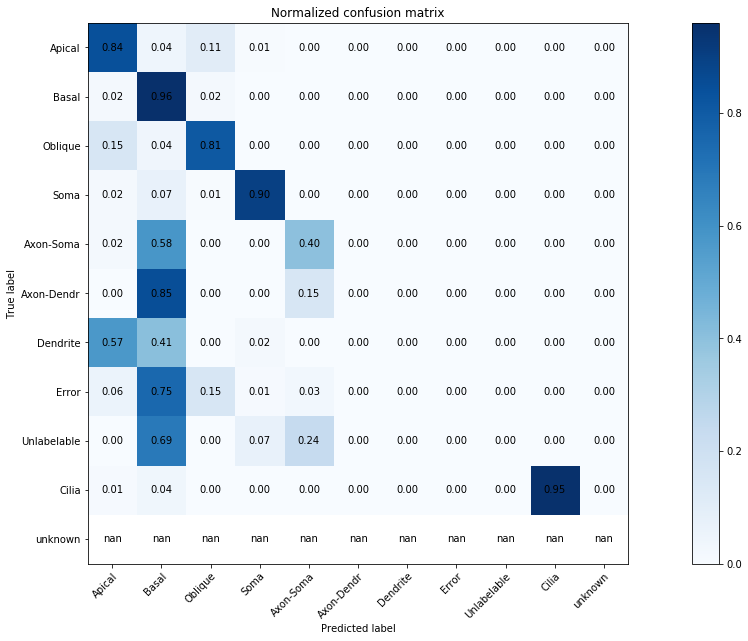

In [3]:
cp.plot_confusion_matrix_from_confusion_matrix(cm_total,classes=classes)